In [11]:
# global
homedir = "/u/az6922/"

import random
def generate_srclinkratearr(rttaverage,size,rseed=0):
    random.seed(rseed)
    rateaverage = (rttaverage-1)//2
    diffarr = [random.randint(-rateaverage+1, rateaverage) for _ in range(size)]
    # required_sum = rateaverage * size
    # current_sum = sum(ratearr)1_
    # last_rate = required_sum - current_sum
    # ratearr.append(last_rate)
    ratearr = [rateaverage+diff for diff in diffarr]
    return ratearr

import pickle
import os
def load_stats(dir,q=1,numqueues=2,numports=2,p=0):
    timelist = list()
    bufferpctlist = list()
    qlenlist = list()
    sentlist = list()
    thptlist = list()
    droplist = list()
    threslist = list()
    for i in range(numports * numqueues):
        qlenlist.append(list())
        sentlist.append(list())
        thptlist.append(list())
        droplist.append(list())
        threslist.append(list())

    with open(dir+"tor.tr", 'r') as f:
        lines = f.readlines()[1:]
        for line in lines:
            tokens = line.split()
            timestamp = int(tokens[0])
            buffer = float(tokens[2])
            for i in range(numports * numqueues):
                qlenlist[i].append(int(tokens[3+i*5]))
            for i in range(numports * numqueues):
                thptlist[i].append(float(tokens[3+i*5+1]))
            for i in range(numports * numqueues):
                sentlist[i].append(int(tokens[3+i*5+2]))
            for i in range(numports * numqueues):
                droplist[i].append(int(tokens[3+i*5+3]))
            for i in range(numports * numqueues):
                threslist[i].append(int(tokens[3+i*5+4]))
            timelist.append(timestamp)
            bufferpctlist.append(buffer)
    
    return [timelist,qlenlist[p*numqueues+q],sentlist[p*numqueues+q],thptlist[p*numqueues+q],droplist[p*numqueues+q],threslist[p*numqueues+q]]

def load_output_log(dir):
    # LOG +1.19381e+10ns 316500
    timelist = list()
    minbufferlist = list()
    with open(dir+"output.tr", 'r') as f:
        lines = f.readlines()
        for line in lines:
            if not line.startswith("LOG"): continue
            tokens = line.split()
            timelist.append(float(tokens[1].rstrip('ns')))
            minbufferlist.append(int(tokens[2]))
    return [timelist,minbufferlist]

def load_output_log_probe(dir):
    # +...ns(time),cmsa,sent,totalbw,n,m,b
    timelist = list()
    cmsalist = list()
    sentlist = list()
    targetlist = list()
    with open(dir+"output.tr", 'r') as f:
        lines = f.readlines()
        for line in lines:
            if not line.startswith('+'): continue
            tokens = line.split(',')
            timelist.append(float(tokens[0].rstrip('ns')))
            cmsa=int(tokens[1])
            cmsalist.append(cmsa)
            sentlist.append(int(tokens[2]))
            totalbw=float(tokens[3])
            n=int(tokens[4])
            m=float(tokens[5])
            b=float(tokens[6])
            target=float(tokens[7].rstrip('\n'))
            targetlist.append(target)
    return [timelist,cmsalist,sentlist,targetlist]

def load_output_data(dir):
    # DATA,+1.1099e+11ns,93000,6241500,19500
    cmsalist = list()
    sentlist = list()
    minbufferlist = list()
    with open(dir+"output.tr", 'r') as f:
        lines = f.readlines()
        for line in lines:
            if not line.startswith("DATA"): continue
            tokens = line.split(',')
            cmsalist.append(int(tokens[2]))
            sentlist.append(int(tokens[3]))
            minbufferlist.append(int(tokens[4]))
    return [cmsalist,sentlist,minbufferlist]

def load_output_convergence(dir):
    # +5.54904e+10ns,39800,6243000,6243001,16500,97,0,0,0,39800,0
    # time,cmsa,sent,3,minbuffer,5,m,b,target,currmin_full_buffer,currmax_nonfull_buffer
    # timelist = list()
    # cmsalist = list()
    # sentlist = list()
    # minbufferlist = list()
    # mlist = list()
    # blist = list()
    # targetlist = list()
    # minfulllist = list()
    # maxnonfulllist = list()

    # +2.7799e+11ns,45,90950,6241500,6243001,4500,528,0,0,0,90950,90350
    # time,proberid,cmsa,sent,4,minbuffer,6,m,b,target,currmin_full_buffer,currmax_nonfull_buffer
    timedict = dict()
    cmsadict = dict()
    sentdict = dict()
    minbufferdict = dict()
    mdict = dict()
    bdict = dict()
    targetdict = dict()
    minfulldict = dict()
    maxnonfulldict = dict()
    with open(dir+"output.tr", 'r') as f:
        lines = f.readlines()
        for line in lines:
            if not line.startswith('+'): continue
            tokens = line.split(',')
            if tokens[1]=="pass" or tokens[1]=="maxbuffer": continue
            proberid = int(tokens[1])
            if proberid not in timedict:
                timedict[proberid] = list()
                cmsadict[proberid] = list()
                sentdict[proberid] = list()
                minbufferdict[proberid] = list()
                mdict[proberid] = list()
                bdict[proberid] = list()
                targetdict[proberid] = list()
                minfulldict[proberid] = list()
                maxnonfulldict[proberid] = list()
            timedict[proberid].append(float(tokens[0].rstrip('ns')))
            cmsadict[proberid].append(int(tokens[2]))
            sentdict[proberid].append(int(tokens[3]))
            minbufferdict[proberid].append(int(tokens[5]))
            mdict[proberid].append(float(tokens[7]))
            bdict[proberid].append(float(tokens[8]))
            targetdict[proberid].append(float(tokens[9]))
            minfulldict[proberid].append(int(tokens[10]))
            maxnonfulldict[proberid].append(int(tokens[11]))
    # return [timelist,cmsalist,sentlist,minbufferlist,mlist,blist,targetlist,minfulllist,maxnonfulllist]
    return [timedict,cmsadict,sentdict,minbufferdict,mdict,bdict,targetdict,minfulldict,maxnonfulldict]

def load_bct(dir,numsender,startsender,simend,numburst):
    startlist = list()
    endlist = list()
    for i in range(numsender):
        with open(f"{dir}gpt_sender{i+startsender}_app0.tr",'r') as f:
            lines = f.readlines()
            for j in range(numburst):
                if len(lines) > j: startlist.append(int(lines[j].split()[0]))
                if len(lines) < numburst*2 and (len(lines)-numburst) < (j+1):
                    endlist.append(simend*1000000)
                else:
                    endlist.append(int(lines[j+numburst].split()[0]))
    return [startlist,endlist]

def load_gpt(dir,numsender):
    # 2100 FlowId 1000 TotalBytes 5611000 SocketState 4 TcpCongState 0 GoodputRxBytes 369240 ThisGoodputRxBytes 369240
    returnlist = list()
    for i in range(numsender):
        timemslist = list()
        thptlist = list()
        gptlist = list()
        with open(f"{dir}gpt_sender{i}_app0.tr",'r') as f:
            lines = f.readlines()
            for line in lines:
                tokens = line.split()
                timemslist.append(int(tokens[0]))
                thptlist.append(int(tokens[4]))
                gptlist.append(int(tokens[10]))
        returnlist.append([timemslist,thptlist,gptlist])
    return returnlist

def load_fct(dir,numsender,startsender):
    # 51022105 FlowId 20000 TotalBytes 5241760
    # 71516996 FlowId 20000 TotalBytes 10000000
    returnlist = list()
    for i in range(startsender,startsender+numsender):
        with open(f"{dir}fct_sender{i}_app0.tr",'r') as f:
            lines = f.readlines()
            if len(lines) < 2:
                returnlist.append(0)
            else:
                startfct = int(lines[0].split()[0])
                endfct = int(lines[1].split()[0])
                returnlist.append(endfct-startfct)
    return returnlist

def load_output_zero(fdir):
    intervallist = list()
    shouldstart = False
    with open(f"{fdir}output.tr",'r') as f:
        lines = f.readlines()
        for line in lines:
            tokens = line.split(',')
            if shouldstart:
                intervalstart = int(tokens[0])
                interval = int(tokens[1])
                intervallist.append([intervalstart,intervalstart+interval])
            else:
                if tokens[0]=="DesignZeroVec":
                    shouldstart = True
    return intervallist

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
# import pandas as pd
import math

def linear_regression(xarr,yarr):
    x = np.array(xarr)
    y = np.array(yarr)

    # Number of data points
    N = len(x)

    # Calculate the slope (m) and intercept (b) using the formulas
    # m = (N * Σ(xi * yi) - Σxi * Σyi) / (N * Σ(xi^2) - (Σxi)^2)
    # b = (Σyi - m * Σxi) / N

    # Calculate sums
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xy = np.sum(x * y)
    sum_x_squared = np.sum(x**2)

    # Calculate the slope (m) and intercept (b)
    m = (N * sum_xy - sum_x * sum_y) / (N * sum_x_squared - sum_x**2)
    b = (sum_y - m * sum_x) / N

    # # Display the equation of the best-fit line
    # print(f"Slope: {m:.2f}, Intercept: {b:.2f}")

    # # Create the best-fit line using the model equation
    # y_pred = m * x + b

    return [m,b]

def get_targetbw(cca,nfstr,rttstr):
    with open(f"{homedir}Buffer/experiments/bulk_dec2624/cca{cca}_maxthpt.txt") as fread:
        lines = fread.readlines()
        for line in lines:
            tokens = line.split(',')
            if nfstr==tokens[0] and rttstr==tokens[1]:
                targetbw_raw = float(tokens[2])
                break
    targetbw = int(((targetbw_raw // 1500)+1) * 1500+1)
    return targetbw

def merge_intervals(intervals):
    if not intervals:
        return []

    merged = [intervals[0]]  # Start with the first interval

    for start, end in intervals[1:]:
        last_start, last_end = merged[-1]

        # If the end of the last interval matches the start of the new interval, merge them
        if last_end == start:
            merged[-1] = (last_start, end)  # Extend the last interval
        else:
            merged.append((start, end))  # Otherwise, add it as a new interval

    return merged

trial 2

In [28]:
webtraceidlist = [2,26,141,95,520]
# webtraceidlist = [520]

In [29]:
ns3seed = 1
numsinks=1
seed = 1
smoothcollection = 500
q=1
middelay = 1
midbw = 1000
srcbw = midbw*2
middelaystr=f"{middelay}"
srcbwstr=f"{srcbw}"
midbwstr=f"{midbw}"
mi=500
# parstring = "5_10_50_20_3_3_5_10_3_5_5_10_5"
parstring = "5_10_50_3_3_3_5_10_3_5_1_10_5"
smooththreshold = 0
mrnq=12

ccanamearr=["realmix"]
realmixdict = {4:45,5:28,7:8,8:8,9:4,10:4,11:1,12:1,13:1}
myccaarr = list()
for cca,count in realmixdict.items():
    for i in range(count):
        myccaarr.append(cca)
rttarr=[300]
numflownamearr=["small"]
smoothwindow = 100
confseedarr = range(10)

numwebtraces = 1
numflowinburst = 1
srclinkrate = 2
sim=20

In [27]:
# for confseed in confseedarr:
#     random.seed(confseed)
#     for numflowname in numflownamearr:
#         if numflowname=="small":
#             numflow = random.randint(10,50)
#         elif numflowname=="large":
#             numflow = random.randint(500,1000)
        
#         for ccaname in ccanamearr:
#             if ccaname=="cubic":
#                 myccaarr = [4]
#             elif ccaname=="bbr":
#                 myccaarr = [5]
#             elif ccaname=="twomix":
#                 myccaarr = list()
#                 for cca,count in twomixdict.items():
#                     for i in range(count):
#                         myccaarr.append(cca)
#             elif ccaname=="realmix":
#                 myccaarr = list()
#                 for cca,count in realmixdict.items():
#                     for i in range(count):
#                         myccaarr.append(cca)
                        
#             for rtt in rttarr:
#                 ratearr = generate_srclinkratearr(rtt,numflow,rseed=confseed)  

#                 for wtid in webtraceidlist:
#                     numwebtraceflow = 0
#                     webtraceflowdict = dict()
#                     tracefile = f"{homedir}Buffer/ns-3.34/webtraces/{wtid}.log"
#                     flowsizelist = list()
#                     with open(tracefile,'r') as freadtrace:
#                         tokens = freadtrace.readlines()[0].split()
#                         for token in tokens:
#                             flowsizelist.append(math.ceil(int(token) / 1500) * 1500)
#                     webtraceflowdict[wtid] = flowsizelist
#                     numwebtraceflow += len(flowsizelist)

#                     conffile = f"{homedir}Buffer/experiments/nsdi26sp/design_burst/configurations/wt{wtid}_cca{ccaname}_nf{numflowname}_rtt{rtt}_cseed{confseed}.conf"
#                     nfconffile = f"{homedir}Buffer/experiments/nsdi26sp/design_burst/nfconfigurations/wt{wtid}_cca{ccaname}_nf{numflowname}_rtt{rtt}_cseed{confseed}.conf"
#                     with open(conffile,'w') as f:
#                         with open(nfconffile,'w') as fnf:
#                             f.write(f"{numflow+numwebtraceflow}\n")
#                             flowid = 0
#                             appstart = 10
#                             webtraceflow = webtraceflowdict[wtid]
#                             i = 0
#                             fnf.write(f"{i}\t{wtid}\t{len(webtraceflow)}\n")
#                             for flowsize in webtraceflow:
#                                 burstsizepkts = int(flowsize//1500)
#                                 f.write(f"0\t{flowid}\tBurstV3\t{burstsizepkts*1000000+numflowinburst}\t{appstart}\t4\t1\t{srclinkrate}\t{numflowinburst}\n")
#                                 flowid += 1

#                             for inf,nf in enumerate(range(numflow)):
#                                 cca = myccaarr[random.randint(0,len(myccaarr)-1)]
#                                 f.write(f"0\t{numwebtraceflow+inf}\tLong\t100001\t0\t{cca}\t1\t{ratearr[inf]}\t1\n")

In [52]:
parstring = "5_10_50_3_3_3_5_10_3_5_1_10_5"
smoothwindow=100
file = f"{homedir}Buffer/experiments/nsdi26sp/design_burst/bulknew_titrate_p.conf"
with open(file,'w') as f:
    for confseed in confseedarr:
        for ccaname in ccanamearr:
            for numflowname in numflownamearr:
                for rtt in rttarr:
                    for i,wtid in enumerate(webtraceidlist):
                        configname = f"wt{wtid}_cca{ccaname}_nf{numflowname}_rtt{rtt}_cseed{confseed}"
                        conffile = f"../experiments/nsdi26sp/design_burst/configurations/{configname}.conf"

                        BDP = int(rtt/1000 * midbw * 1000000/8)
                        totalbuffer = 2*BDP
                        startbuffer = totalbuffer
                        targetbw = int(totalbuffer//10)

                        # Titrate
                        # pawmode="paw"
                        pawmode="p"
                        qdisctype="Fifo"
                        bufferalg="111"
                        startbuffer = int(totalbuffer//10)
                        confstr = f"--targetBW={targetbw} --mainRoomNumQueues={mrnq}"
                        logstr = f"{totalbuffer}_{bufferalg}_0_204_{mrnq}_{startbuffer}/{srcbwstr}_{targetbw}"
                        f.write(f"\"star-buffer-mp --simDuration={sim} --logging --queueDiscType={qdisctype} --qdiscSize={totalbuffer//1500+1} --appConfigFile={conffile} --numSinks={numsinks} --midDelayString={middelaystr} --srcBwString={srcbwstr} --midBwString={midbwstr} --bufferSize={totalbuffer} --bufferAlgorithm={bufferalg} --startProbeBuffer={startbuffer} --monitorInterval={mi} --smoothQlenCollection={smoothcollection} --smoothWindow={smoothwindow} --smoothOutlierThreshold={smooththreshold} --pawMode={pawmode} --randomSeed={ns3seed} {confstr}\",logs/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/output.tr\n")

                        # CoDel
                        # pawmode="fixed"
                        # qdisctype="CoDel"
                        # bufferalg="101"
                        # alpha=8
                        # confstr = f"--codelTarget=5ms --codelInterval=100ms --alphaString={alpha} --targetBW={targetbw}"
                        # logstr = f"codel_5ms_100ms/{totalbuffer}_{bufferalg}_{alpha}_204_1_{startbuffer}/{srcbwstr}_{targetbw}"
                        # f.write(f"\"star-buffer-mp --simDuration={sim} --logging --queueDiscType={qdisctype} --qdiscSize={totalbuffer//1500+1} --appConfigFile={conffile} --numSinks={numsinks} --midDelayString={middelaystr} --srcBwString={srcbwstr} --midBwString={midbwstr} --bufferSize={totalbuffer} --bufferAlgorithm={bufferalg} --startProbeBuffer={startbuffer} --monitorInterval={mi} --smoothQlenCollection={smoothcollection} --smoothWindow={smoothwindow} --smoothOutlierThreshold={smooththreshold} --pawMode={pawmode} --randomSeed={ns3seed} {confstr}\",logs/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/output.tr\n")

                        # # PIE
                        # pawmode="fixed"
                        # qdisctype="Pie"
                        # bufferalg="101"
                        # alpha=8
                        # confstr = f"--pieTarget=20ms --alphaString={alpha} --targetBW={targetbw}"
                        # logstr = f"pie_20ms/{totalbuffer}_{bufferalg}_{alpha}_204_1_{startbuffer}/{srcbwstr}_{targetbw}"
                        # f.write(f"\"star-buffer-mp --simDuration={sim} --logging --queueDiscType={qdisctype} --qdiscSize={totalbuffer//1500+1} --appConfigFile={conffile} --numSinks={numsinks} --midDelayString={middelaystr} --srcBwString={srcbwstr} --midBwString={midbwstr} --bufferSize={totalbuffer} --bufferAlgorithm={bufferalg} --startProbeBuffer={startbuffer} --monitorInterval={mi} --smoothQlenCollection={smoothcollection} --smoothWindow={smoothwindow} --smoothOutlierThreshold={smooththreshold} --pawMode={pawmode} --randomSeed={ns3seed} {confstr}\",logs/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/output.tr\n")

                        # # Static1
                        # pawmode="fixed"
                        # qdisctype="Fifo"
                        # bufferalg="111"
                        # startbuffer = BDP
                        # confstr = f"--targetBW={targetbw}"
                        # logstr = f"{totalbuffer}_{bufferalg}_0_204_1_{startbuffer}/{srcbwstr}_{targetbw}"
                        # f.write(f"\"star-buffer-mp --simDuration={sim} --logging --queueDiscType={qdisctype} --qdiscSize={totalbuffer//1500+1} --appConfigFile={conffile} --numSinks={numsinks} --midDelayString={middelaystr} --srcBwString={srcbwstr} --midBwString={midbwstr} --bufferSize={totalbuffer} --bufferAlgorithm={bufferalg} --startProbeBuffer={startbuffer} --monitorInterval={mi} --smoothQlenCollection={smoothcollection} --smoothWindow={smoothwindow} --smoothOutlierThreshold={smooththreshold} --pawMode={pawmode} --randomSeed={ns3seed} {confstr}\",logs/{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/output.tr\n")

In [19]:
import xmltodict

def load_webtrace_xml(xmlfile,nfconfigfile,flowstart=201,flowend=1298):
    # print(f"{flowstart},{flowend}")
    # nfconfigfile = "/u/az6922/Buffer/experiments/nsdi26sp/design_burst/nfconfigurations/webtraces10_ccacubic_nf100_rtt10_cseed0.conf"
    webtracesdict = dict()
    with open(nfconfigfile,'r') as f:
        lines = f.readlines()
        for line in lines:
            tokens = line.split()
            webtracesdict[int(tokens[0])] = int(tokens[2])

    # xmlfile = '/u/az6922/Buffer/ns-3.34/logs/webtraces10_ccacubic_nf100_rtt10_cseed0_paw/5000000_111_0_204_12_2500000/200_0/0/1_500_2_4/5_10_50_20_3_3_5_10_3_5_5_10_5/500_100_500000/1/flowmonitor.xml'
    with open(xmlfile) as f:
        data = xmltodict.parse(f.read())

    flowidlist = range(flowstart,flowend,2)
    flows = data['FlowMonitor']['FlowStats']['Flow']
    # print(len(flows))
    whichwt = 0
    countwt = 0
    starttimelist = list()
    endtimelist = list()
    numdroplist = list()
    resultlist = [[],[],[]]
    for flowid in flowidlist:
        # print(f"flowid={flowid}")
        flow = data['FlowMonitor']['FlowStats']['Flow'][flowid]
        starttime = int(float(flow['@timeFirstTxPacket'][:-2]))
        endtime = int(float(flow['@timeLastRxPacket'][:-2]))
        numdrop = int(flow['@lostPackets'])
        flowback = data['FlowMonitor']['FlowStats']['Flow'][flowid+1]
        numdropback = int(flowback['@lostPackets'])
        if countwt < webtracesdict[whichwt]:
            starttimelist.append(starttime)
            endtimelist.append(endtime)
            numdroplist.append(numdrop+numdropback)
            countwt+=1
        else:
            resultlist[0].append(starttimelist)
            resultlist[1].append(endtimelist)
            resultlist[2].append(numdroplist)
            starttimelist = list()
            endtimelist = list()
            numdroplist = list()
            whichwt+=1
            countwt=0
            starttimelist.append(starttime)
            endtimelist.append(endtime)
            numdroplist.append(numdrop+numdropback)
            countwt+=1
    resultlist[0].append(starttimelist)
    resultlist[1].append(endtimelist)
    resultlist[2].append(numdroplist)

    return resultlist

In [ ]:
datafdir = "az6922_data/nsdi26sp/"
# datafdir = "az6922_data/backup_nsdi26sp/clem4/"
titratedatafdir = "Buffer/ns-3.34/logs/"
parstring = "5_10_50_20_3_3_5_10_3_5_5_10_5"
parstring2 = "5_10_50_3_3_3_5_10_3_5_1_10_5"
datadict = dict()
for confseed in confseedarr:
    for ccaname in ccanamearr:
        for numflowname in numflownamearr:
            for rtt in rttarr:
                for i,wtid in enumerate(webtraceidlist):
                    configname = f"wt{wtid}_cca{ccaname}_nf{numflowname}_rtt{rtt}_cseed{confseed}"
                    conffile = f"{homedir}Buffer/experiments/nsdi26sp/design_burst/configurations/wt{wtid}_cca{ccaname}_nf{numflowname}_rtt{rtt}_cseed{confseed}.conf"
                    nfconffile = f"{homedir}Buffer/experiments/nsdi26sp/design_burst/nfconfigurations/wt{wtid}_cca{ccaname}_nf{numflowname}_rtt{rtt}_cseed{confseed}.conf"
                    with open(conffile,'r') as f:
                        line = f.readlines()[0]
                        tokens = line.split()
                        totalnumflow = int(tokens[0])
                    with open(nfconffile,'r') as f:
                        line = f.readlines()[0]
                        tokens = line.split()
                        burstnumflow = int(tokens[2])
                    longnumflow = totalnumflow-burstnumflow
                    flowstart = longnumflow*2
                    flowend = totalnumflow*2

                    # print(configname)
                    # print(f"{flowstart},{flowend}")

                    # BDP = int(rtt/1000 * midbw * 1000000/8)
                    # totalbuffer = 2*BDP
                    # startbuffer = totalbuffer
                    # targetbw = int(totalbuffer//10)

                    datadict[configname] = dict()
                    datadict[configname]["titrate"] = dict()
                    datadict[configname]["p"] = dict()
                    datadict[configname]["codel"] = dict()
                    datadict[configname]["pie"] = dict()
                    datadict[configname]["static"] = dict()

                    BDP = int(rtt/1000 * midbw * 1000000/8)
                    totalbuffer = 2*BDP
                    targetbw = int(totalbuffer//10)
                    smoothwindow=100

                    # Titrate
                    pawmode="paw"
                    qdisctype="Fifo"
                    bufferalg="111"
                    startbuffer = int(totalbuffer//10)
                    confstr = f"--targetBW={targetbw} --mainRoomNumQueues={mrnq}"
                    logstr = f"{totalbuffer}_{bufferalg}_0_204_{mrnq}_{startbuffer}/{srcbwstr}_{targetbw}"
                    fdir1 = f"{homedir}{titratedatafdir}{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/"
                    fdir2 = f"{homedir}{titratedatafdir}{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring2}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/"
                    # print(fdir1)
                    # print(fdir2)
                    if os.path.exists(fdir1+"tor.tr"):
                        fdir = fdir1
                    elif os.path.exists(fdir2+"tor.tr"):
                        fdir = fdir2
                    else:
                        fdir = ""
                    if not os.path.exists(fdir+"tor.tr"):
                        print(f"***Warning: {fdir}tor.tr not found")
                    else:
                        print(f"{fdir}tor.tr")
                        statslist = load_stats(fdir,q=1,numqueues=2,numports=numsinks,p=0)
                        if len(statslist[0])<sim*1000: print(f"***Short logs: {configname}, totalbuffer={totalbuffer}, srcbwstr={srcbwstr}, {len(statslist[0])}")
                        datadict[configname]["titrate"]["tor"] = statslist
                    if os.path.exists(f"{fdir}flowmonitor.xml"):
                        xmllist = load_webtrace_xml(f"{fdir}flowmonitor.xml",nfconffile,flowstart,flowend)
                        datadict[configname]["titrate"]["xml"] = xmllist

                    # p
                    pawmode="p"
                    qdisctype="Fifo"
                    bufferalg="111"
                    startbuffer = int(totalbuffer//10)
                    confstr = f"--targetBW={targetbw} --mainRoomNumQueues={mrnq}"
                    logstr = f"{totalbuffer}_{bufferalg}_0_204_{mrnq}_{startbuffer}/{srcbwstr}_{targetbw}"
                    fdir1 = f"{homedir}{titratedatafdir}{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/"
                    fdir2 = f"{homedir}{titratedatafdir}{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring2}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/"
                    # print(fdir1)
                    # print(fdir2)
                    if os.path.exists(fdir1+"tor.tr"):
                        fdir = fdir1
                    elif os.path.exists(fdir2+"tor.tr"):
                        fdir = fdir2
                    else:
                        fdir = ""
                    if not os.path.exists(fdir+"tor.tr"):
                        print(f"***Warning: {fdir}tor.tr not found")
                    else:
                        print(f"{fdir}tor.tr")
                        statslist = load_stats(fdir,q=1,numqueues=2,numports=numsinks,p=0)
                        if len(statslist[0])<sim*1000: print(f"***Short logs: {configname}, totalbuffer={totalbuffer}, srcbwstr={srcbwstr}, {len(statslist[0])}")
                        datadict[configname]["p"]["tor"] = statslist
                    if os.path.exists(f"{fdir}flowmonitor.xml"):
                        xmllist = load_webtrace_xml(f"{fdir}flowmonitor.xml",nfconffile,flowstart,flowend)
                        datadict[configname]["p"]["xml"] = xmllist
                    
                    startbuffer = totalbuffer
                    smoothwindow = 600

                    # CoDel
                    pawmode="fixed"
                    qdisctype="CoDel"
                    bufferalg="101"
                    alpha=8
                    confstr = f"--codelTarget=5ms --codelInterval=100ms --alphaString={alpha} --targetBW={targetbw}"
                    logstr = f"codel_5ms_100ms/{totalbuffer}_{bufferalg}_{alpha}_204_1_{startbuffer}/{srcbwstr}_{targetbw}"
                    fdir1 = f"{homedir}{datafdir}{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/"
                    fdir2 = f"{homedir}{datafdir}{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring2}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/"
                    # print(fdir1)
                    # print(fdir2)
                    if os.path.exists(fdir1+"tor.tr"):
                        fdir = fdir1
                    elif os.path.exists(fdir2+"tor.tr"):
                        fdir = fdir2
                    else:
                        fdir = ""
                    if not os.path.exists(fdir+"tor.tr"):
                        print(f"***Warning: {fdir}tor.tr not found")
                    else:
                        print(f"{fdir}tor.tr")
                        statslist = load_stats(fdir,q=1,numqueues=2,numports=numsinks,p=0)
                        if len(statslist[0])<sim*1000: print(f"***Short logs: {configname}, totalbuffer={totalbuffer}, srcbwstr={srcbwstr}, {len(statslist[0])}")
                        datadict[configname]["codel"]["tor"] = statslist
                    if os.path.exists(f"{fdir}flowmonitor.xml"):
                        xmllist = load_webtrace_xml(f"{fdir}flowmonitor.xml",nfconffile,flowstart,flowend)
                        datadict[configname]["codel"]["xml"] = xmllist

                    # PIE
                    pawmode="fixed"
                    qdisctype="Pie"
                    bufferalg="101"
                    alpha=8
                    confstr = f"--pieTarget=20ms --alphaString={alpha} --targetBW={targetbw}"
                    logstr = f"pie_20ms/{totalbuffer}_{bufferalg}_{alpha}_204_1_{startbuffer}/{srcbwstr}_{targetbw}"
                    fdir1 = f"{homedir}{datafdir}{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/"
                    fdir2 = f"{homedir}{datafdir}{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring2}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/"
                    if os.path.exists(fdir1+"tor.tr"):
                        fdir = fdir1
                    elif os.path.exists(fdir2+"tor.tr"):
                        fdir = fdir2
                    else:
                        fdir = ""
                    if not os.path.exists(fdir+"tor.tr"):
                        print(f"***Warning: {fdir}tor.tr not found")
                    else:
                        print(f"{fdir}tor.tr")
                        statslist = load_stats(fdir,q=1,numqueues=2,numports=numsinks,p=0)
                        if len(statslist[0])<sim*1000: print(f"***Short logs: {configname}, totalbuffer={totalbuffer}, srcbwstr={srcbwstr}, {len(statslist[0])}")
                        datadict[configname]["pie"]["tor"] = statslist
                    if os.path.exists(f"{fdir}flowmonitor.xml"):
                        xmllist = load_webtrace_xml(f"{fdir}flowmonitor.xml",nfconffile,flowstart,flowend)
                        datadict[configname]["pie"]["xml"] = xmllist

                    # Static
                    pawmode="fixed"
                    qdisctype="Fifo"
                    bufferalg="111"
                    startbuffer = BDP
                    confstr = f"--targetBW={targetbw}"
                    logstr = f"{totalbuffer}_{bufferalg}_0_204_1_{startbuffer}/{srcbwstr}_{targetbw}"
                    fdir1 = f"{homedir}{datafdir}{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/"
                    fdir2 = f"{homedir}{datafdir}{configname}_{pawmode}/{logstr}/0/1_{mi}_2_4/{parstring2}/{smoothcollection}_{smoothwindow}_{smooththreshold}/{ns3seed}/"
                    if os.path.exists(fdir1+"tor.tr"):
                        fdir = fdir1
                    elif os.path.exists(fdir2+"tor.tr"):
                        fdir = fdir2
                    else:
                        fdir = ""
                    if not os.path.exists(fdir+"tor.tr"):
                        print(f"***Warning: {fdir}tor.tr not found")
                    else:
                        print(f"{fdir}tor.tr")
                        statslist = load_stats(fdir,q=1,numqueues=2,numports=numsinks,p=0)
                        if len(statslist[0])<sim*1000: print(f"***Short logs: {configname}, totalbuffer={totalbuffer}, srcbwstr={srcbwstr}, {len(statslist[0])}")
                        datadict[configname]["static"]["tor"] = statslist
                    if os.path.exists(f"{fdir}flowmonitor.xml"):
                        xmllist = load_webtrace_xml(f"{fdir}flowmonitor.xml",nfconffile,flowstart,flowend)
                        datadict[configname]["static"]["xml"] = xmllist


In [26]:
# with open(f'{homedir}az6922_data/pickle/burst5.pickle', 'wb') as handle:
#     pickle.dump(datadict, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [76]:
# with open(f'{homedir}az6922_data/pickle/burst20.pickle', 'wb') as handle:
#     pickle.dump(datadict, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [75]:
with open(f'{homedir}az6922_data/pickle/burstnew.pickle', 'wb') as handle:
    pickle.dump(datadict, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [4]:
with open(f'{homedir}az6922_data/pickle/burst5.pickle', 'rb') as handle:
    datadict = pickle.load(handle)

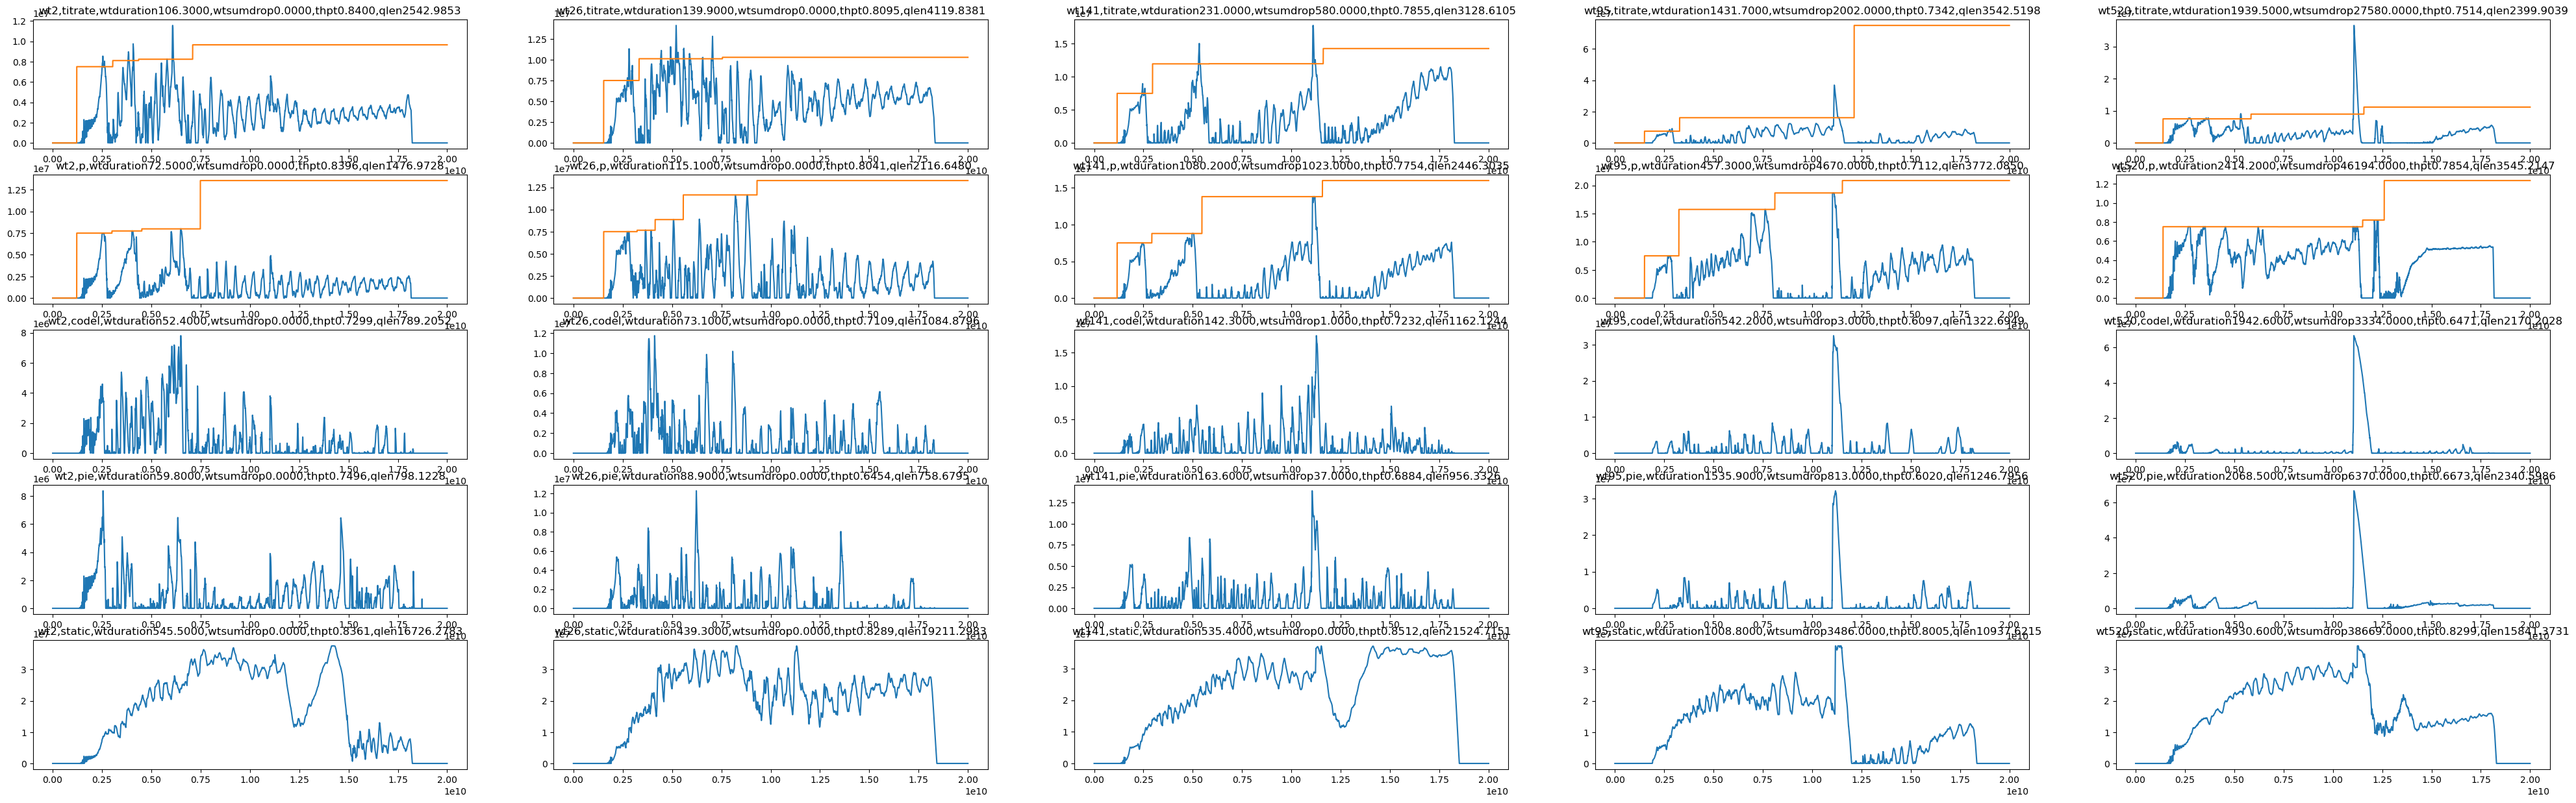

In [67]:
schemearr = ["titrate","p","codel","pie","static"]
arrstart = 0 # 99000 # 0 # 95000
arrend = 20000 # 101000 # 200000 # 105000
# [arrstart:arrend]
nr = len(schemearr)*1
nc = max(2,len(webtraceidlist))
fig,axs = plt.subplots(nr,nc,figsize=(10*nc,3*nr))

ccaname = ccanamearr[0]
numflowname = numflownamearr[0]
rtt = rttarr[0]
confseed=2
for iw,wtid in enumerate(webtraceidlist):
    configname = f"wt{wtid}_cca{ccaname}_nf{numflowname}_rtt{rtt}_cseed{confseed}"

    for ischeme,scheme in enumerate(schemearr):
        if "tor" in datadict[configname][scheme]:
            datator = datadict[configname][scheme]["tor"]
            time = datator[0][arrstart:arrend]
            qlen = datator[1][arrstart:arrend]
            sent = datator[2][arrstart:arrend]
            thpt = datator[3][arrstart:arrend]
            drop = datator[4][arrstart:arrend]
            thres = datator[5][arrstart:arrend]

            axs[ischeme,iw].plot(time,qlen)
            if scheme.startswith("titrate") or scheme=="p": axs[ischeme,iw].plot(time,thres)
            # axs[ischeme*3,iw].set_title(f"{scheme},thpt{sum(thpt)/len(thpt):.4f},qlen{sum(qlen)/len(qlen)/1000:.4f},drop{sum(drop)/sum(sent):.4f}")

        if "xml" in datadict[configname][scheme]:
            dataxml = datadict[configname][scheme]["xml"]
            wtstartlist = dataxml[0][arrstart:arrend]
            wtendlist = dataxml[1][arrstart:arrend]
            wtdrop = dataxml[2][arrstart:arrend]

            wtduration = list()
            wtsumdrop = list()
            for i in range(numwebtraces):
                wtduration.append(max(wtendlist[i])-min(wtstartlist[i]))
                wtsumdrop.append(sum(wtdrop[i]))
            
            # axs[ischeme*3+1,iw].plot(range(numwebtraces),wtduration)
            # axs[ischeme*3+1,iw].set_title(f"wtduration{sum(wtduration)/len(wtduration)/1000000:.4f}")
            # axs[ischeme*3+2,iw].plot(range(numwebtraces),wtsumdrop)
            # axs[ischeme*3+2,iw].set_title(f"wtsumdrop{sum(wtsumdrop)/len(wtsumdrop):.4f}")

            axs[ischeme,iw].set_title(f"wt{wtid},{scheme},wtduration{sum(wtduration)/len(wtduration)/1000000:.4f},wtsumdrop{sum(wtsumdrop)/len(wtsumdrop):.4f},thpt{sum(thpt)/len(thpt):.4f},qlen{sum(qlen)/len(qlen)/1000:.4f}")

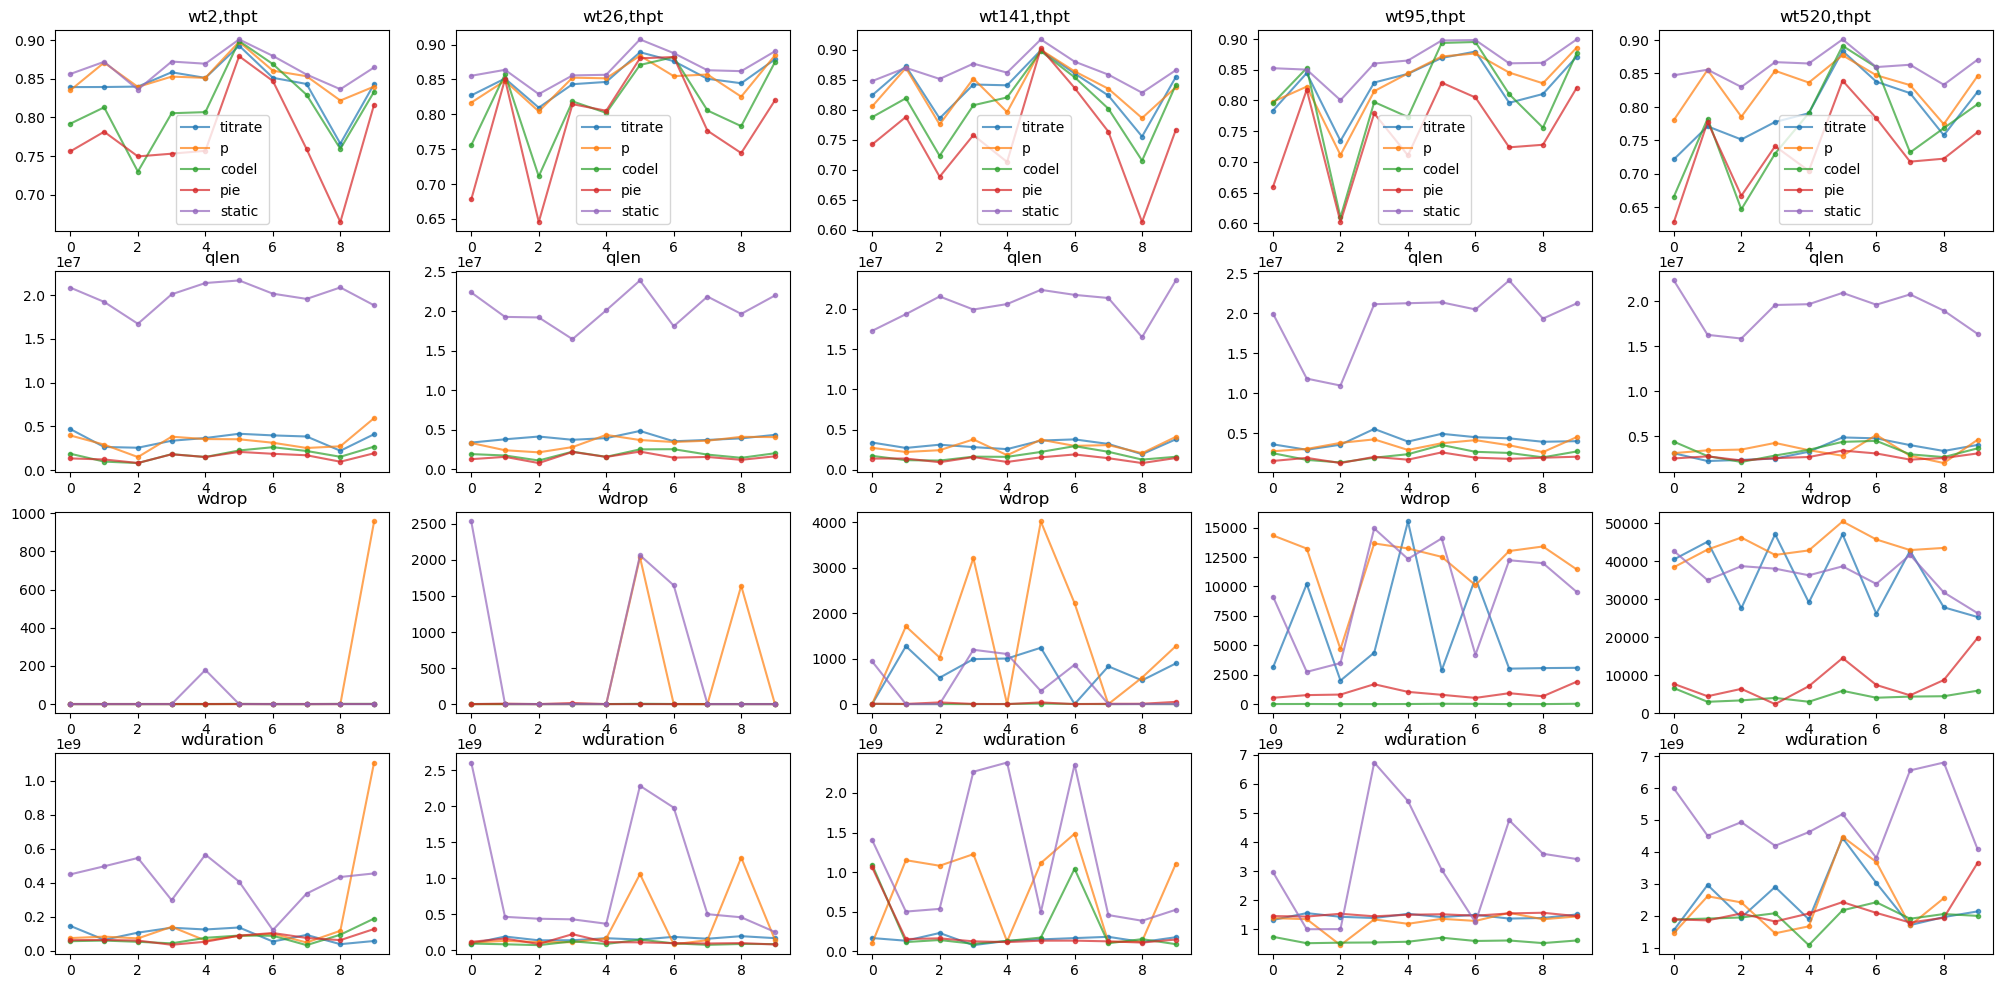

In [74]:
schemearr = ["titrate","p","codel","pie","static"]
arrstart = 0 # 99000 # 0 # 95000
arrend = 20000 # 101000 # 200000 # 105000
# [arrstart:arrend]
nr = 4
nc = len(webtraceidlist)
fig,axs = plt.subplots(nr,nc,figsize=(5*nc,3*nr))

ccaname = ccanamearr[0]
numflowname = numflownamearr[0]
rtt = rttarr[0]

for iw,wtid in enumerate(webtraceidlist):
    for scheme in schemearr:

        thptlist = list()
        qlenlist = list()
        wdroplist = list()
        wdurationlist = list()
        for confseed in confseedarr:
            configname = f"wt{wtid}_cca{ccaname}_nf{numflowname}_rtt{rtt}_cseed{confseed}"

            if "tor" in datadict[configname][scheme]:
                datator = datadict[configname][scheme]["tor"]
                time = datator[0][arrstart:arrend]
                qlen = datator[1][arrstart:arrend]
                sent = datator[2][arrstart:arrend]
                thpt = datator[3][arrstart:arrend]
                drop = datator[4][arrstart:arrend]
                thres = datator[5][arrstart:arrend]

                thptlist.append(sum(thpt)/len(thpt))
                qlenlist.append(sum(qlen)/len(qlen))

            if "xml" in datadict[configname][scheme]:
                dataxml = datadict[configname][scheme]["xml"]
                wtstartlist = dataxml[0][arrstart:arrend]
                wtendlist = dataxml[1][arrstart:arrend]
                wtdrop = dataxml[2][arrstart:arrend]

                wtduration = list()
                wtsumdrop = list()
                for i in range(numwebtraces):
                    wtduration.append(max(wtendlist[i])-min(wtstartlist[i]))
                    wtsumdrop.append(sum(wtdrop[i]))

                wdroplist.append(sum(wtsumdrop)/len(wtsumdrop))
                wdurationlist.append(sum(wtduration)/len(wtduration))

        axs[0,iw].plot(confseedarr,thptlist,label=scheme,marker='.',alpha=0.7)
        axs[0,iw].set_title(f"wt{wtid},thpt")
        axs[0,iw].legend()
        axs[1,iw].plot(confseedarr,qlenlist,marker='.',alpha=0.7)
        axs[1,iw].set_title("qlen")
        axs[2,iw].plot(range(len(wdroplist)),wdroplist,marker='.',alpha=0.7)
        axs[2,iw].set_title("wdrop")
        axs[3,iw].plot(range(len(wdurationlist)),wdurationlist,marker='.',alpha=0.7)
        axs[3,iw].set_title("wduration")

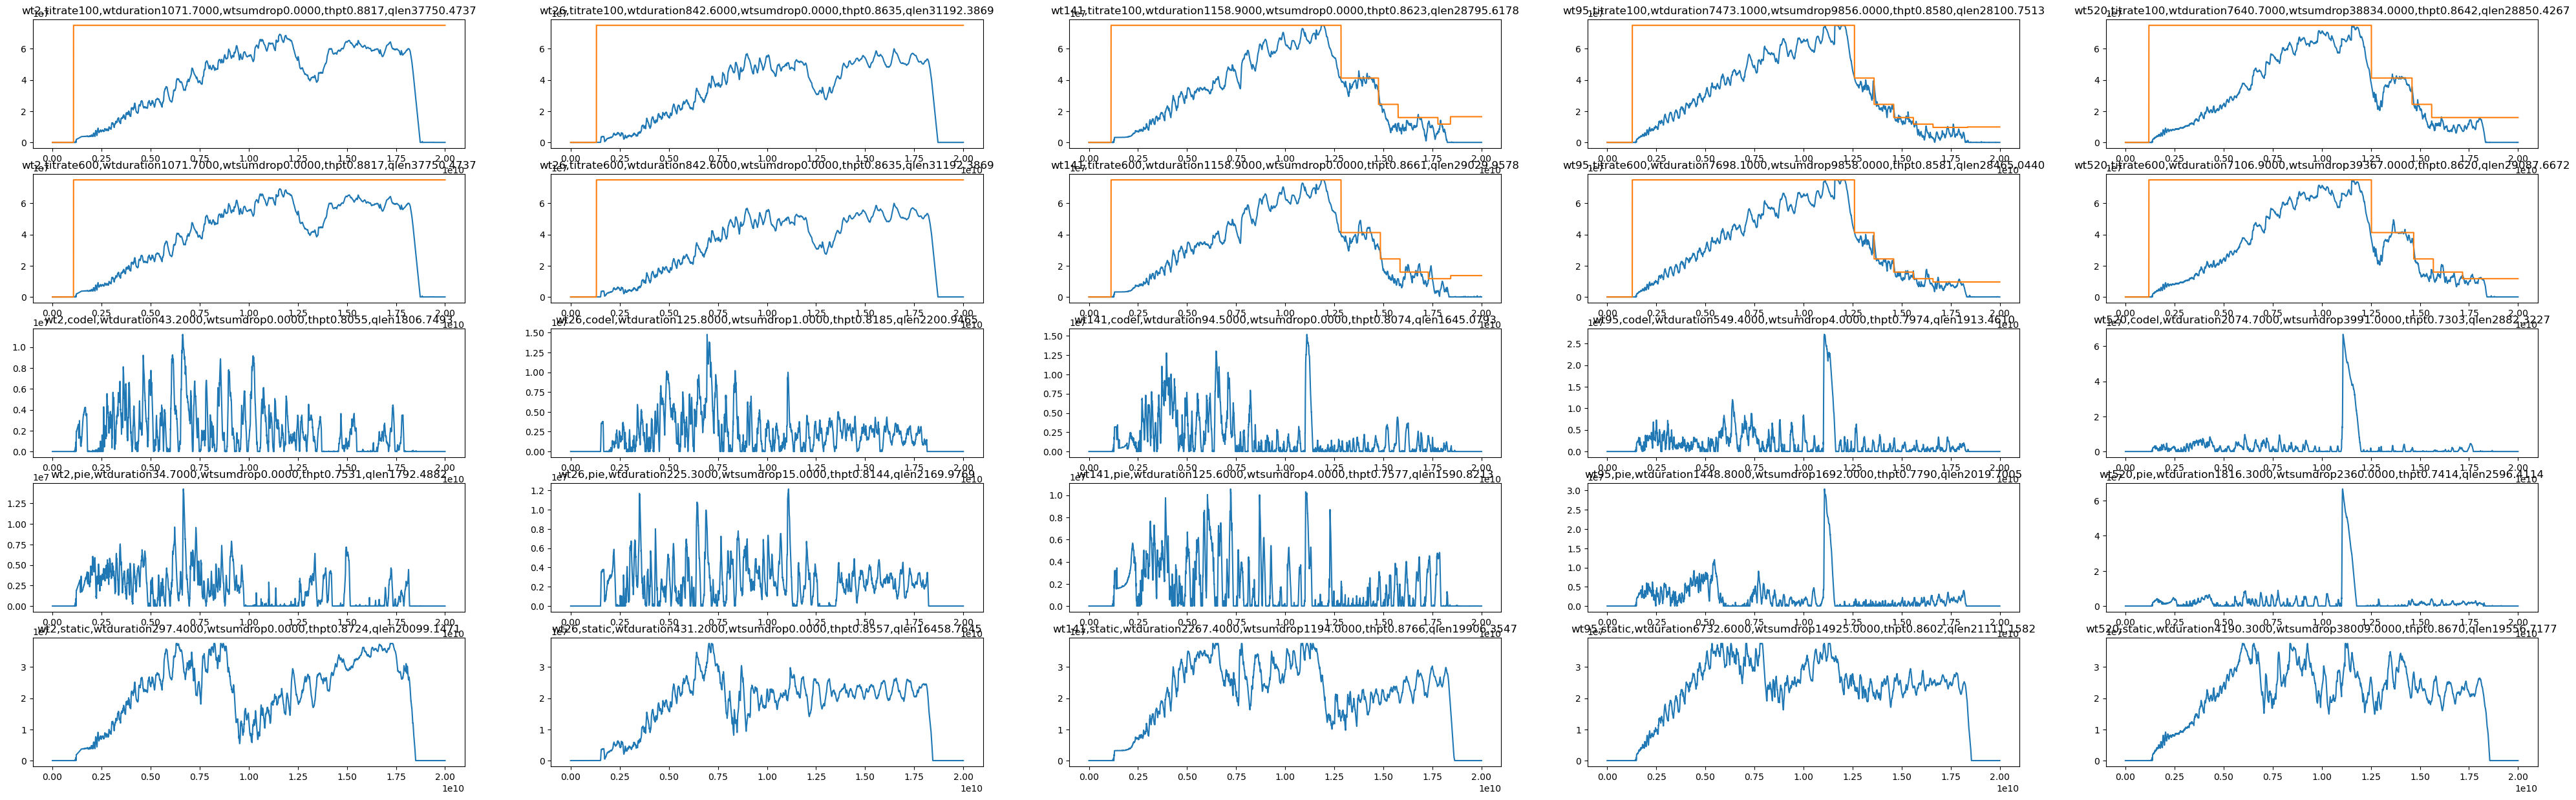

In [ ]:
# schemearr = ["titrate100","titrate600","codel","pie","static"]
# arrstart = 0 # 99000 # 0 # 95000
# arrend = 20000 # 101000 # 200000 # 105000
# # [arrstart:arrend]
# nr = len(schemearr)*1
# nc = len(webtraceidlist)
# fig,axs = plt.subplots(nr,nc,figsize=(10*nc,3*nr))

# ccaname = ccanamearr[0]
# numflowname = numflownamearr[0]
# rtt = rttarr[0]
# confseed=3
# for iw,wtid in enumerate(webtraceidlist):
#     configname = f"wt{wtid}_cca{ccaname}_nf{numflowname}_rtt{rtt}_cseed{confseed}"

#     for ischeme,scheme in enumerate(schemearr):
#         datator = datadict[configname][scheme]["tor"]
#         time = datator[0][arrstart:arrend]
#         qlen = datator[1][arrstart:arrend]
#         sent = datator[2][arrstart:arrend]
#         thpt = datator[3][arrstart:arrend]
#         drop = datator[4][arrstart:arrend]
#         thres = datator[5][arrstart:arrend]

#         axs[ischeme,iw].plot(time,qlen)
#         if scheme.startswith("titrate"): axs[ischeme,iw].plot(time,thres)
#         # axs[ischeme*3,iw].set_title(f"{scheme},thpt{sum(thpt)/len(thpt):.4f},qlen{sum(qlen)/len(qlen)/1000:.4f},drop{sum(drop)/sum(sent):.4f}")

#         dataxml = datadict[configname][scheme]["xml"]
#         wtstartlist = dataxml[0][arrstart:arrend]
#         wtendlist = dataxml[1][arrstart:arrend]
#         wtdrop = dataxml[2][arrstart:arrend]

#         wtduration = list()
#         wtsumdrop = list()
#         for i in range(numwebtraces):
#             wtduration.append(max(wtendlist[i])-min(wtstartlist[i]))
#             wtsumdrop.append(sum(wtdrop[i]))
        
#         # axs[ischeme*3+1,iw].plot(range(numwebtraces),wtduration)
#         # axs[ischeme*3+1,iw].set_title(f"wtduration{sum(wtduration)/len(wtduration)/1000000:.4f}")
#         # axs[ischeme*3+2,iw].plot(range(numwebtraces),wtsumdrop)
#         # axs[ischeme*3+2,iw].set_title(f"wtsumdrop{sum(wtsumdrop)/len(wtsumdrop):.4f}")

#         axs[ischeme,iw].set_title(f"wt{wtid},{scheme},wtduration{sum(wtduration)/len(wtduration)/1000000:.4f},wtsumdrop{sum(wtsumdrop)/len(wtsumdrop):.4f},thpt{sum(thpt)/len(thpt):.4f},qlen{sum(qlen)/len(qlen)/1000:.4f}")

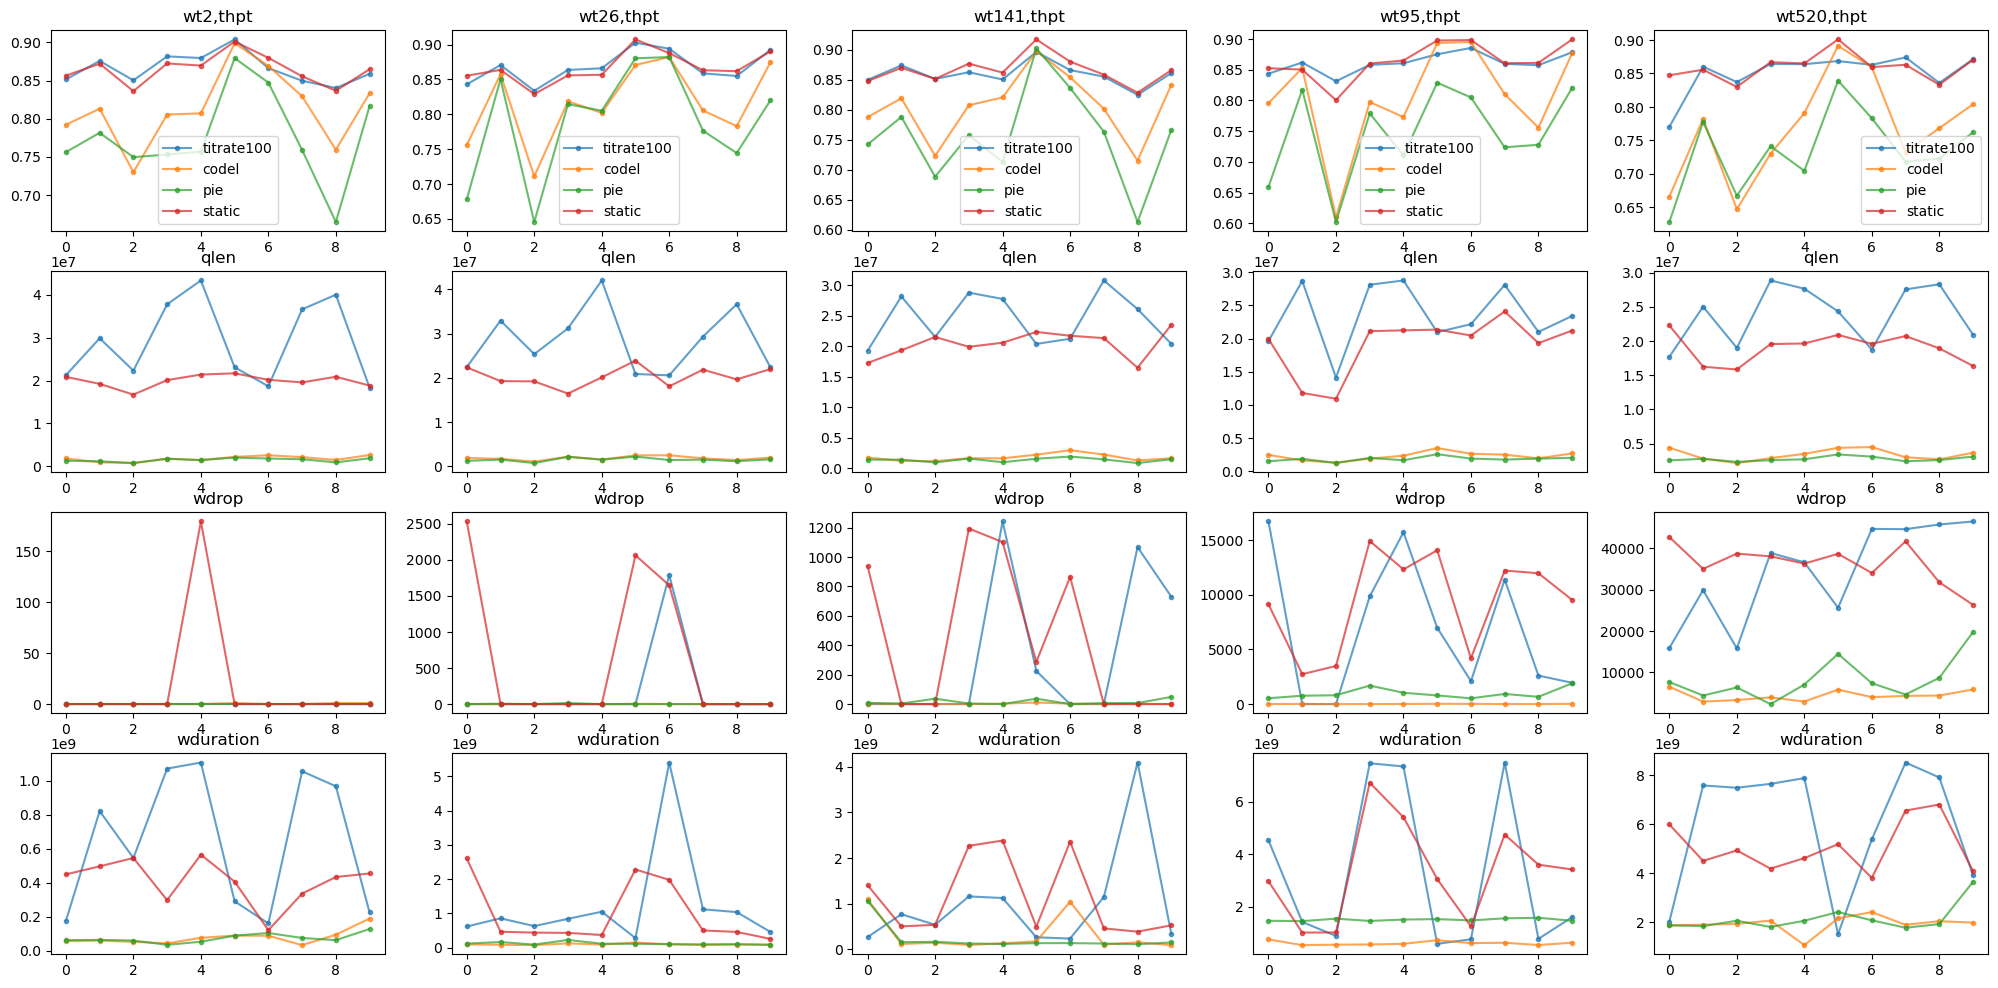

In [8]:
# schemearr = ["titrate100","codel","pie","static"]
# arrstart = 0 # 99000 # 0 # 95000
# arrend = 20000 # 101000 # 200000 # 105000
# # [arrstart:arrend]
# nr = 4
# nc = len(webtraceidlist)
# fig,axs = plt.subplots(nr,nc,figsize=(5*nc,3*nr))

# ccaname = ccanamearr[0]
# numflowname = numflownamearr[0]
# rtt = rttarr[0]

# for iw,wtid in enumerate(webtraceidlist):
#     for scheme in schemearr:

#         thptlist = list()
#         qlenlist = list()
#         wdroplist = list()
#         wdurationlist = list()
#         for confseed in confseedarr:
#             configname = f"wt{wtid}_cca{ccaname}_nf{numflowname}_rtt{rtt}_cseed{confseed}"

#             if "tor" in datadict[configname][scheme]:
#                 datator = datadict[configname][scheme]["tor"]
#                 time = datator[0][arrstart:arrend]
#                 qlen = datator[1][arrstart:arrend]
#                 sent = datator[2][arrstart:arrend]
#                 thpt = datator[3][arrstart:arrend]
#                 drop = datator[4][arrstart:arrend]
#                 thres = datator[5][arrstart:arrend]

#                 thptlist.append(sum(thpt)/len(thpt))
#                 qlenlist.append(sum(qlen)/len(qlen))

#             if "xml" in datadict[configname][scheme]:
#                 dataxml = datadict[configname][scheme]["xml"]
#                 wtstartlist = dataxml[0][arrstart:arrend]
#                 wtendlist = dataxml[1][arrstart:arrend]
#                 wtdrop = dataxml[2][arrstart:arrend]

#                 wtduration = list()
#                 wtsumdrop = list()
#                 for i in range(numwebtraces):
#                     wtduration.append(max(wtendlist[i])-min(wtstartlist[i]))
#                     wtsumdrop.append(sum(wtdrop[i]))

#                 wdroplist.append(sum(wtsumdrop)/len(wtsumdrop))
#                 wdurationlist.append(sum(wtduration)/len(wtduration))

#         axs[0,iw].plot(confseedarr,thptlist,label=scheme,marker='.',alpha=0.7)
#         axs[0,iw].set_title(f"wt{wtid},thpt")
#         axs[0,iw].legend()
#         axs[1,iw].plot(confseedarr,qlenlist,marker='.',alpha=0.7)
#         axs[1,iw].set_title("qlen")
#         axs[2,iw].plot(range(len(wdroplist)),wdroplist,marker='.',alpha=0.7)
#         axs[2,iw].set_title("wdrop")
#         axs[3,iw].plot(range(len(wdurationlist)),wdurationlist,marker='.',alpha=0.7)
#         axs[3,iw].set_title("wduration")